<a href="https://colab.research.google.com/github/dagapurva3/ECE657A-assign/blob/main/ECE657A_Assign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, skew
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.over_sampling import SMOTE
from collections import Counter
from prettytable import PrettyTable


# Set seaborn style
# sns.set(style="ticks", color_codes=True)
sns.set(style="whitegrid")

# Part 1: Assessment of Data and Applying Normalization

1.1 Wine dataset

In [ ]:
# Load Wine Quality Dataset
wine_red = pd.read_csv("winequality-red.csv", sep=';')
wine_white = pd.read_csv("winequality-white.csv", sep=';')

# Add color column (0 = white, 1 = red)
wine_white['color'] = 0
wine_red['color'] = 1
full_wine_dataset = pd.concat([wine_white,wine_red])

In [ ]:
wine_duplicates = full_wine_dataset[full_wine_dataset.duplicated()] #duplicates in dataset
wine_duplicates

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.2             0.230         0.32             8.5      0.058   
5               8.1             0.280         0.40             6.9      0.050   
7               7.0             0.270         0.36            20.7      0.045   
8               6.3             0.300         0.34             1.6      0.049   
20              6.2             0.660         0.48             1.2      0.029   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13             2.0      0.076   
1564            7.2             0.695         0.13             2.0      0.076   
1567            7.2             0.695         0.13             2.0      0.076   
1581            6.2             0.560         0.09             1.7      0.053   
1596            6.3             0.510         0.13             2.3      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    47.0                 186.0  0.99560  3.19       0.40   
5                    30.0                  97.0  0.99510  3.26       0.44   
7                    45.0                 170.0  1.00100  3.00       0.45   
8                    14.0                 132.0  0.99400  3.30       0.49   
20                   29.0                  75.0  0.98920  3.33       0.39   
...                   ...                   ...      ...   ...        ...   
1563                 12.0                  20.0  0.99546  3.29       0.54   
1564                 12.0                  20.0  0.99546  3.29       0.54   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  color  
4         9.9        6      0  
5        10.1        6      0  
7         8.8        6      0  
8         9.5        6      0  
20       12.8        8      0  
...       ...      ...    ...  
1563     10.1        5      1  
1564     10.1        5      1  
1567     10.1        5      1  
1581     11.3        5      1  
1596     11.0        6      1  

[1177 rows x 13 columns]

In [ ]:
full_wine_dataset = full_wine_dataset.drop_duplicates()
print("Value count for feature color")
print(full_wine_dataset['color'].value_counts())

Value count for feature color
color
0    3961
1    1359
Name: count, dtype: int64


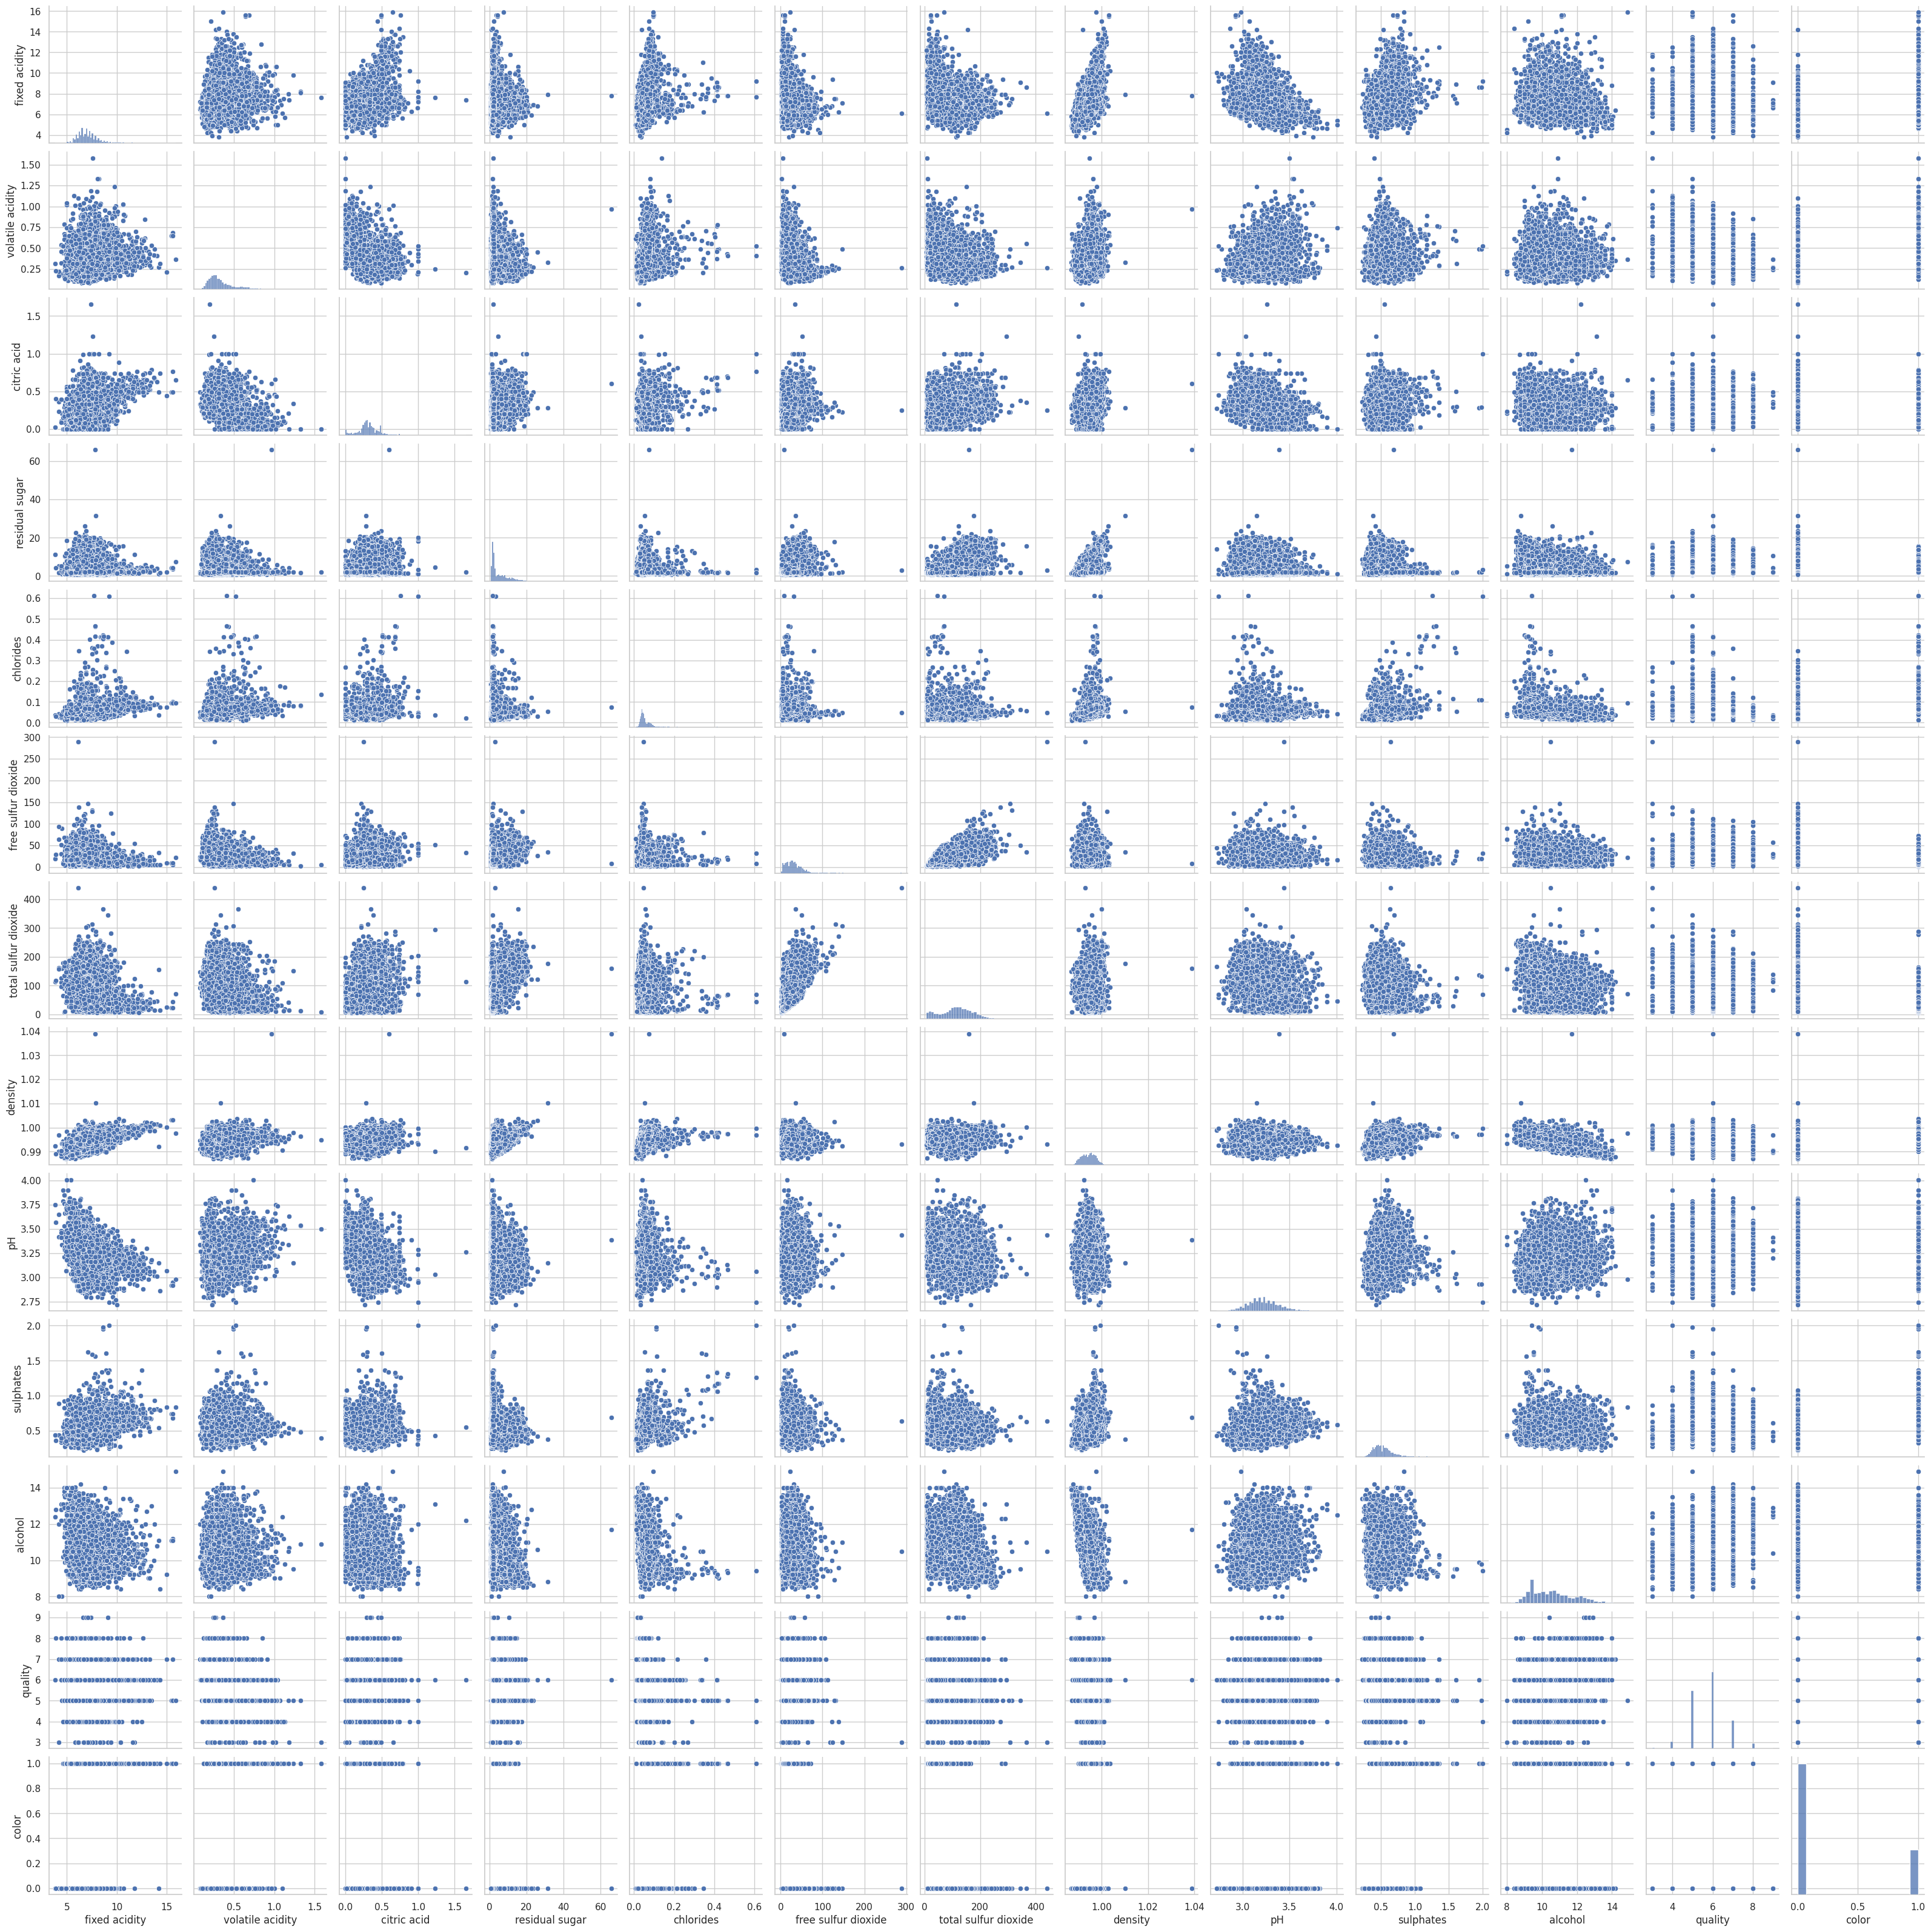

In [ ]:
sns.pairplot(full_wine_dataset)
plt.show()

'Mean:'

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
color                    1.000000
dtype: float64

'Median:'

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
color                    1.00000
dtype: float64

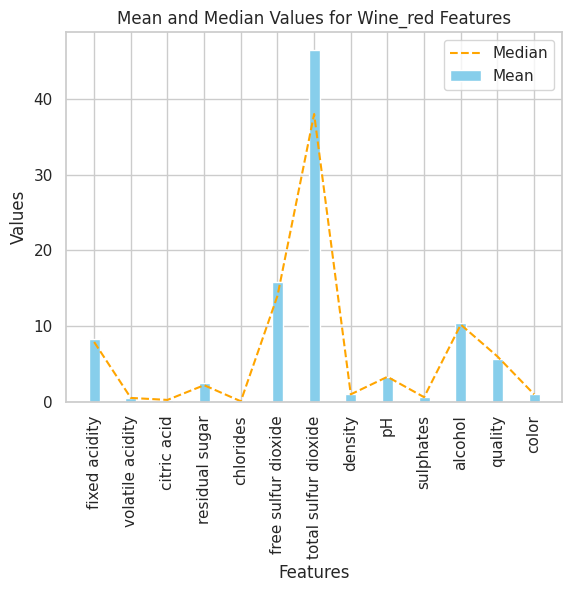

In [ ]:
means = wine_red.mean()
medians = wine_red.median()

display('Mean:', means)
display('Median:', medians)

# Create a bar graph for the mean values
fig, ax = plt.subplots()
bar_width = 0.3
bar_means = ax.bar(means.index, means.values, bar_width, color='skyblue', label='Mean')  # Bar graph color

# Create a line graph for the median values
ax.plot(medians.index, medians.values, '--', color='orange', label='Median')  # Line graph color

# Add labels and title to the plot
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Mean and Median Values for Wine_red Features')
ax.legend()

# Rotate x-axis labels and show the plot
plt.xticks(rotation=90)
plt.show()

'Mean:'

fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   5.877909
color                     0.000000
dtype: float64

'Median:'

fixed acidity             6.80000
volatile acidity          0.26000
citric acid               0.32000
residual sugar            5.20000
chlorides                 0.04300
free sulfur dioxide      34.00000
total sulfur dioxide    134.00000
density                   0.99374
pH                        3.18000
sulphates                 0.47000
alcohol                  10.40000
quality                   6.00000
color                     0.00000
dtype: float64

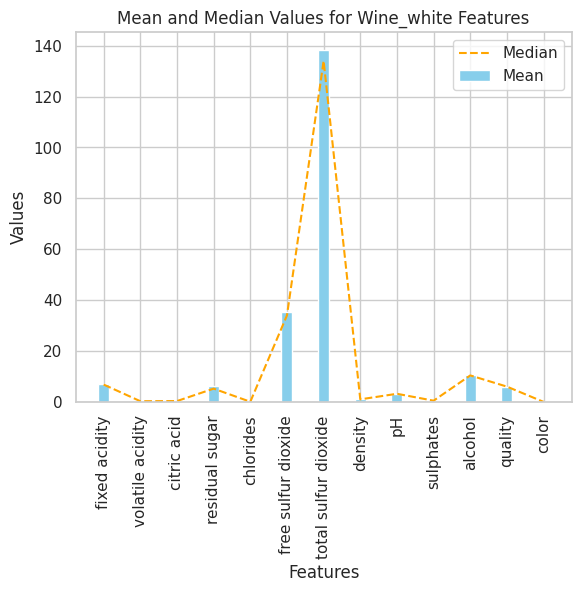

In [ ]:
means = wine_white.mean()
medians = wine_white.median()

display('Mean:', means)
display('Median:', medians)

# Create a bar graph for the mean values
fig, ax = plt.subplots()
bar_width = 0.3
bar_means = ax.bar(means.index, means.values, bar_width, color='skyblue', label='Mean')  # Bar graph color

# Create a line graph for the median values
ax.plot(medians.index, medians.values, '--', color='orange', label='Median')  # Line graph color

# Add labels and title to the plot
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Mean and Median Values for Wine_white Features')
ax.legend()

# Rotate x-axis labels and show the plot
plt.xticks(rotation=90)
plt.show()

'variance:'

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
color                      0.000000
dtype: float64

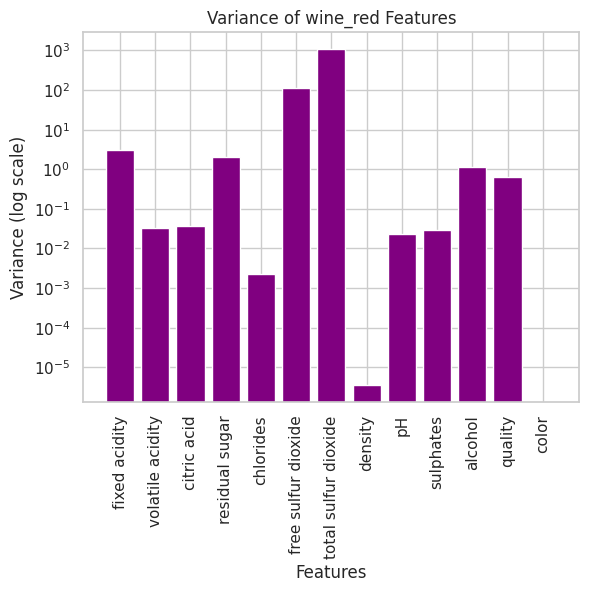

In [ ]:
variances = wine_red.var()
display('variance:', variances)
# Create a bar graph of the variance values
fig, ax = plt.subplots()
ax.bar(variances.index, variances.values, color='purple')
ax.set_yscale('log')
# Add labels and title to the plot
ax.set_xlabel('Features')
ax.set_ylabel('Variance (log scale)')
ax.set_title('Variance of wine_red Features')

# Show the plot
plt.xticks(rotation=90)
plt.show()

'variance:'

fixed acidity              0.712114
volatile acidity           0.010160
citric acid                0.014646
residual sugar            25.725770
chlorides                  0.000477
free sulfur dioxide      289.242720
total sulfur dioxide    1806.085491
density                    0.000009
pH                         0.022801
sulphates                  0.013025
alcohol                    1.514427
quality                    0.784356
color                      0.000000
dtype: float64

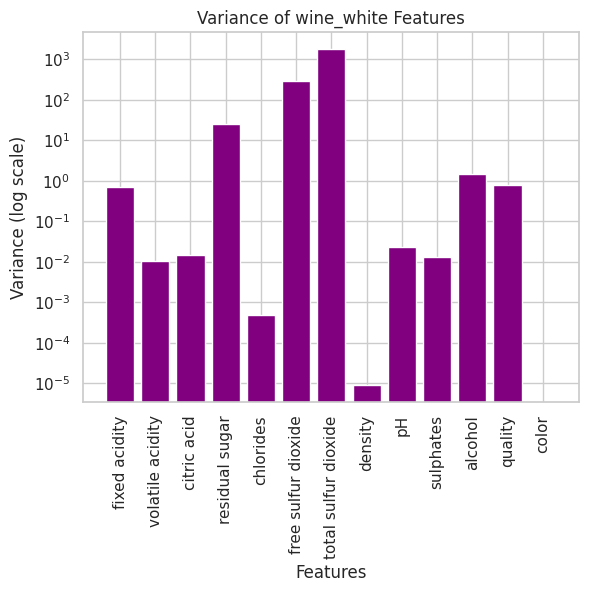

In [ ]:
variances = wine_white.var()
display('variance:', variances)
# Create a bar graph of the variance values
fig, ax = plt.subplots()
ax.bar(variances.index, variances.values, color='purple')
ax.set_yscale('log')
# Add labels and title to the plot
ax.set_xlabel('Features')
ax.set_ylabel('Variance (log scale)')
ax.set_title('Variance of wine_white Features')

# Show the plot
plt.xticks(rotation=90)
plt.show()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')


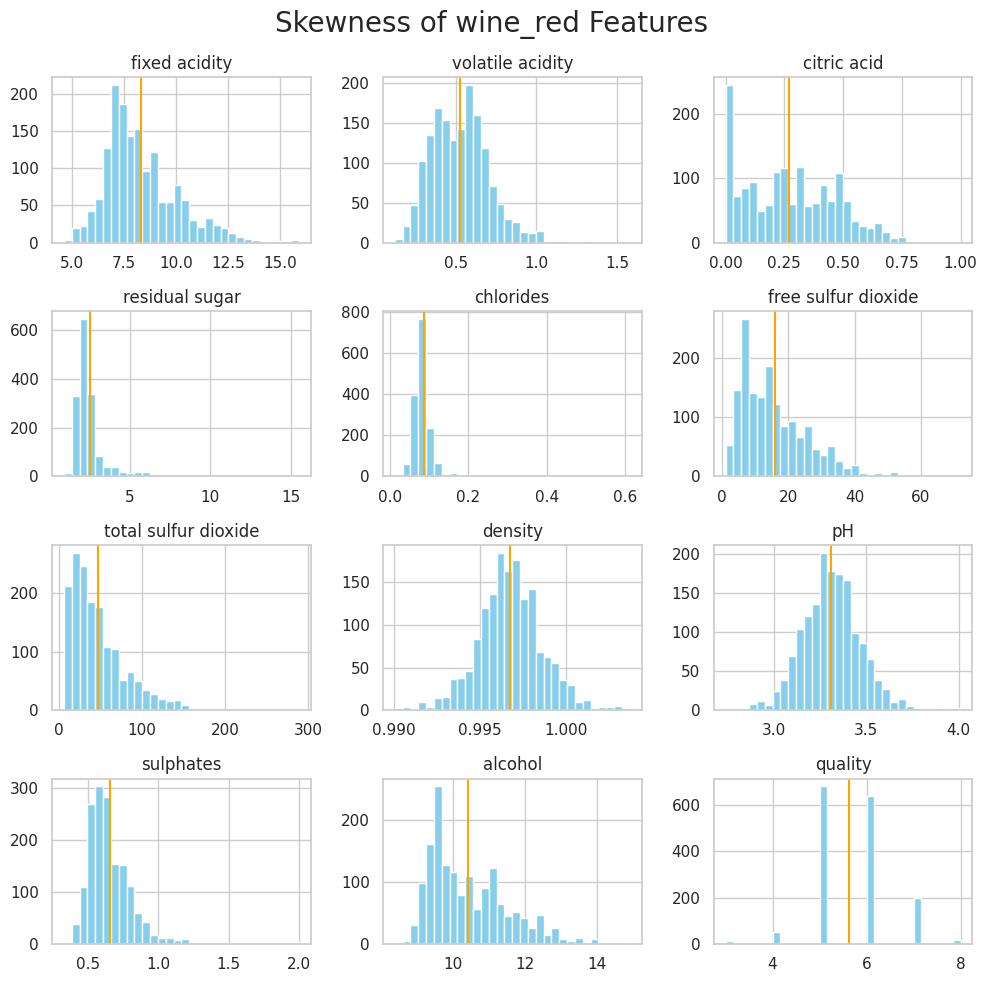

In [ ]:
print(wine_red.columns)

column_names = [
    "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
    "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
    "pH", "sulphates", "alcohol", "quality"
]

# Plot skewness for each feature
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))

for x, ax in zip(column_names[:], axs.flat):
    if x in wine_red.columns:  # Ensure the column exists
        # Customize histogram color
        wine_red[x].hist(bins=30, ax=ax, color='skyblue')  # Set histogram color

        # Customize mean line color
        ax.axvline(x=np.mean(wine_red[x]), color='orange', label='mean')  # Set mean line color

        ax.set_title(x)

# Add overall title and adjust layout
plt.suptitle('Skewness of wine_red Features', fontsize=20)
plt.tight_layout()
plt.show()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')


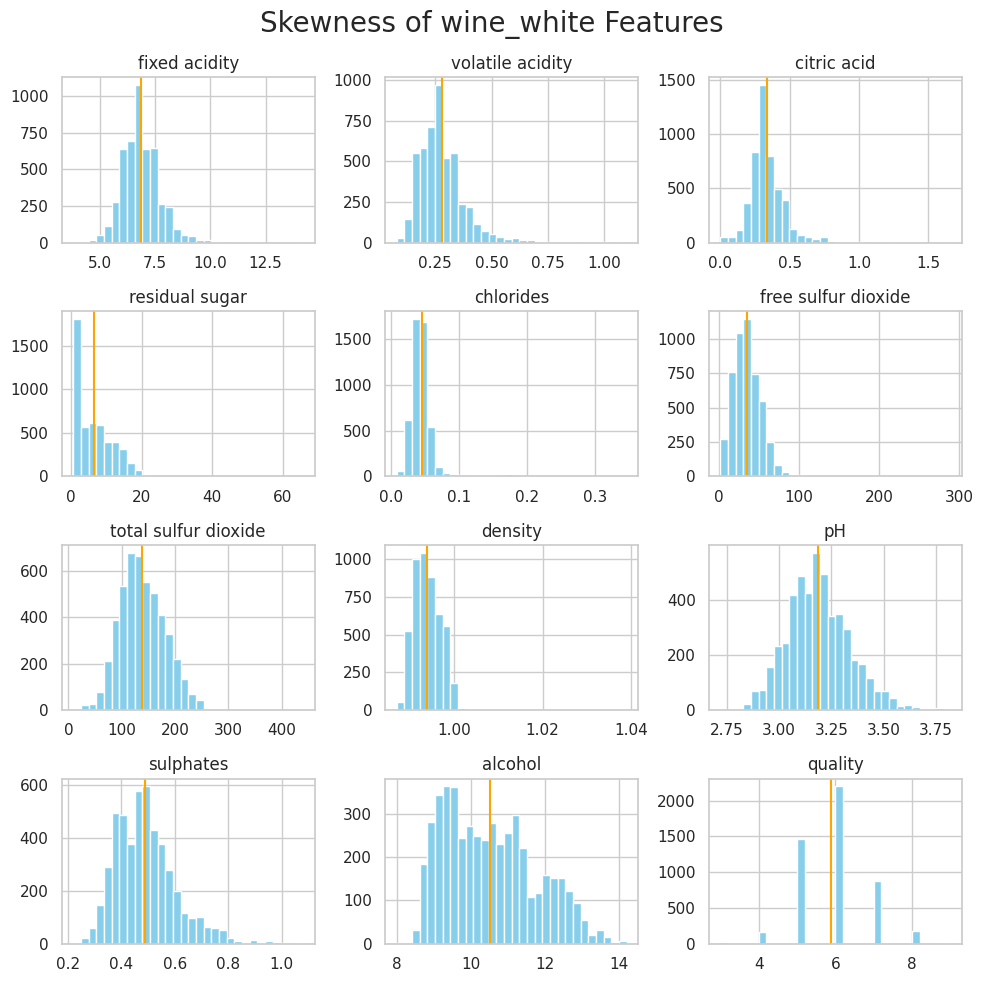

In [ ]:
print(wine_white.columns)

column_names = [
    "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
    "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
    "pH", "sulphates", "alcohol", "quality"
]

# Plot skewness for each feature
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))

for x, ax in zip(column_names[:], axs.flat):
    if x in wine_red.columns:  # Ensure the column exists
        # Customize histogram color
        wine_white[x].hist(bins=30, ax=ax, color='skyblue')  # Set histogram color

        # Customize mean line color
        ax.axvline(x=np.mean(wine_white[x]), color='orange', label='mean')  # Set mean line color

        ax.set_title(x)

# Add overall title and adjust layout
plt.suptitle('Skewness of wine_white Features', fontsize=20)
plt.tight_layout()
plt.show()

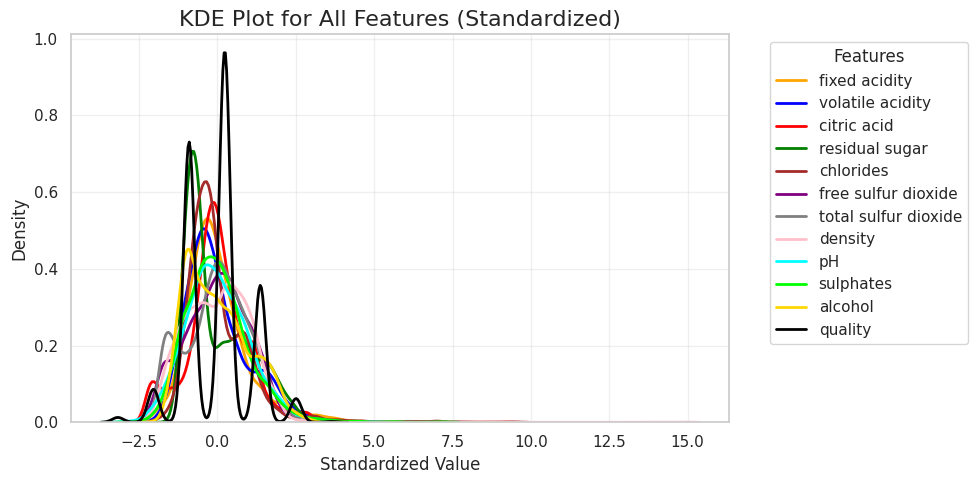

In [ ]:
features = [
    "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
    "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
    "pH", "sulphates", "alcohol", "quality"
]

# Standardize the data to have mean=0 and std=1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(full_wine_dataset[features])
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Define a color palette for the plots
colors = [
    'orange', 'blue', 'red', 'green', 'brown', 'purple', 'gray', 'pink',
    'cyan', 'lime', 'gold', 'black'
]

# Plot KDE for each feature on the same graph
plt.figure(figsize=(10, 5))
for feature, color in zip(features, colors):
    sns.kdeplot(scaled_df[feature], label=feature, color=color, linewidth=2)

# Add a legend, title, and axis labels
plt.legend(title="Features", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("KDE Plot for All Features (Standardized)", fontsize=16)
plt.xlabel("Standardized Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

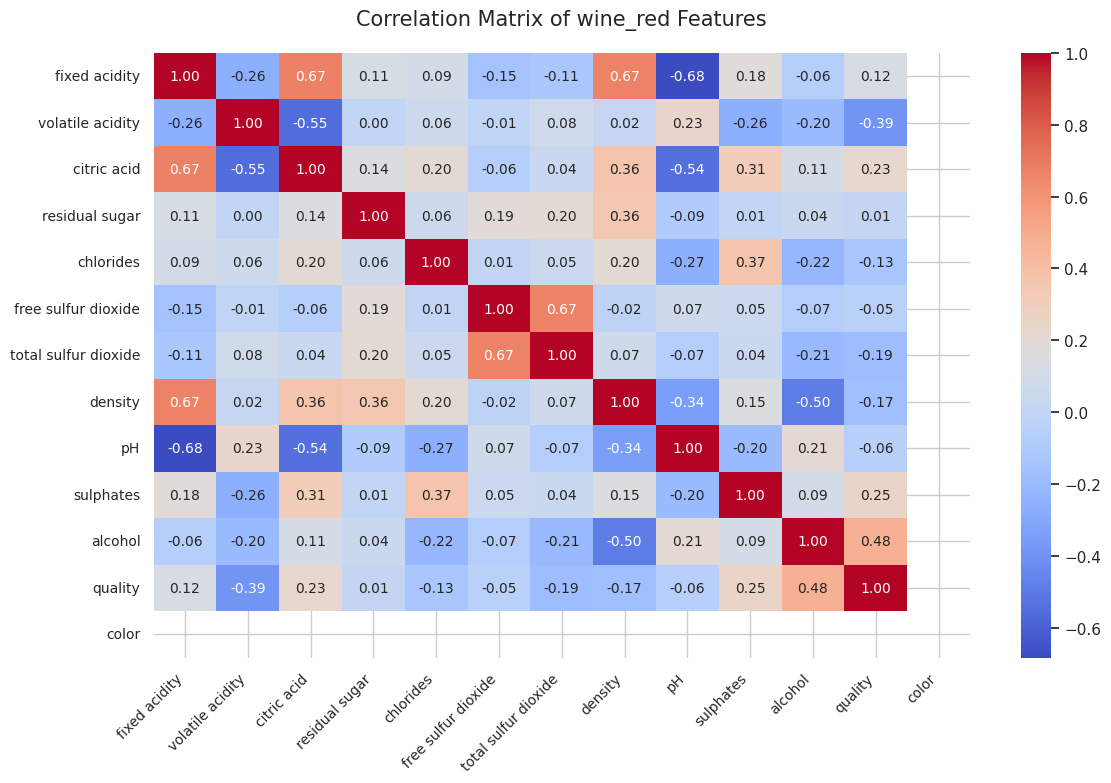

In [ ]:
cormat = wine_red.corr()
round(cormat, 4)

# Plot the heatmap with additional formatting to prevent overlapping
plt.figure(figsize=(12, 8))  # Increase figure size for better readability
sns.heatmap(cormat, cmap='coolwarm', annot=True, fmt=".2f", annot_kws={"size": 10})  # Adjust annotation size

# Rotate x and y axis labels to prevent overlap
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels
plt.yticks(rotation=0, fontsize=10)  # Keep y-axis labels horizontal

# Add title and adjust layout
plt.title("Correlation Matrix of wine_red Features", fontsize=15, pad=20)
plt.tight_layout()

plt.show()

In [ ]:
print("Missing values in Wine dataset:", full_wine_dataset.isnull().sum())

Missing values in Wine dataset: fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64


In [ ]:
# Compute summary statistics
wine_stats = full_wine_dataset.describe().T
wine_stats['Variance'] = full_wine_dataset.var()
wine_stats['Skew'] = full_wine_dataset.skew()
wine_stats['Kurtosis'] = full_wine_dataset.kurt()
display(wine_stats)

count        mean        std      min      25%  \
fixed acidity         5320.0    7.215179   1.319671  3.80000   6.4000   
volatile acidity      5320.0    0.344130   0.168248  0.08000   0.2300   
citric acid           5320.0    0.318494   0.147157  0.00000   0.2400   
residual sugar        5320.0    5.048477   4.500180  0.60000   1.8000   
chlorides             5320.0    0.056690   0.036863  0.00900   0.0380   
free sulfur dioxide   5320.0   30.036654  17.805045  1.00000  16.0000   
total sulfur dioxide  5320.0  114.109023  56.774223  6.00000  74.0000   
density               5320.0    0.994535   0.002966  0.98711   0.9922   
pH                    5320.0    3.224664   0.160379  2.72000   3.1100   
sulphates             5320.0    0.533357   0.149743  0.22000   0.4300   
alcohol               5320.0   10.549241   1.185933  8.00000   9.5000   
quality               5320.0    5.795677   0.879772  3.00000   5.0000   
color                 5320.0    0.255451   0.436155  0.00000   0.0000   

                            50%        75%        max     Variance      Skew  \
fixed acidity           7.00000    7.70000   15.90000     1.741531  1.650417   
volatile acidity        0.30000    0.41000    1.58000     0.028307  1.504557   
citric acid             0.31000    0.40000    1.66000     0.021655  0.484309   
residual sugar          2.70000    7.50000   65.80000    20.251621  1.706550   
chlorides               0.04700    0.06600    0.61100     0.001359  5.338237   
free sulfur dioxide    28.00000   41.00000  289.00000   317.019619  1.362719   
total sulfur dioxide  116.00000  153.25000  440.00000  3223.312421  0.063614   
density                 0.99465    0.99677    1.03898     0.000009  0.666326   
pH                      3.21000    3.33000    4.01000     0.025721  0.389969   
sulphates               0.51000    0.60000    2.00000     0.022423  1.809454   
alcohol                10.40000   11.40000   14.90000     1.406437  0.545696   
quality                 6.00000    6.00000    9.00000     0.773999  0.147467   
color                   0.00000    1.00000    1.00000     0.190232  1.121806   

                       Kurtosis  
fixed acidity          4.589079  
volatile acidity       2.863175  
citric acid            2.582471  
residual sugar         7.025595  
chlorides             48.260708  
free sulfur dioxide    9.520706  
total sulfur dioxide  -0.299997  
density                8.711498  
pH                     0.431811  
sulphates              8.612917  
alcohol               -0.538169  
quality                0.298100  
color                 -0.741831

In [ ]:
continuous_features = [feature for feature in full_wine_dataset.select_dtypes(np.number).columns if feature not in ['quality', 'color']]

In [ ]:
from scipy.stats import skew
def skewness_score(dataset, feature_list):
    variables = []
    skew_scores = []
    transformed_skew_scores = []
    for feature in feature_list:
        variables.append(feature)
        skew_scores.append(skew(dataset[feature]))
        if (float(skew(dataset[feature])) >= 0.6) | (float(skew(dataset[feature])) <= -0.6):
          dataset[feature] = np.sqrt(dataset[feature])
        transformed_skew_scores.append(skew(dataset[feature]))
        skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after square root transformation of skewed features': transformed_skew_scores}
        skewness_score = pd.DataFrame(skew_dict)
    return skewness_score

In [ ]:
skewness_score(full_wine_dataset, continuous_features)

Feature  Skewness Score before transformation  \
0          fixed acidity                              1.649952   
1       volatile acidity                              1.504133   
2            citric acid                              0.484172   
3         residual sugar                              1.706069   
4              chlorides                              5.336732   
5    free sulfur dioxide                              1.362335   
6   total sulfur dioxide                              0.063596   
7                density                              0.666138   
8                     pH                              0.389859   
9              sulphates                              1.808944   
10               alcohol                              0.545542   

    Skewness score after square root transformation of skewed features  
0                                            1.228333                   
1                                            0.892989                   
2                                            0.484172                   
3                                            0.838859                   
4                                            2.449945                   
5                                            0.081903                   
6                                            0.063596                   
7                                            0.643824                   
8                                            0.389859                   
9                                            0.972599                   
10                                           0.545542

In [ ]:
print(full_wine_dataset['color'].value_counts())

color
0    3961
1    1359
Name: count, dtype: int64


<ipython-input-77-7cc11464417b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x= 'color', data=full_wine_dataset, palette = 'coolwarm')


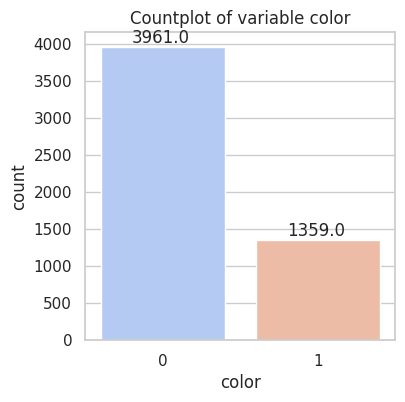

In [ ]:
plt.figure(figsize=(4,4))
plt.ticklabel_format(style='plain')
plt.gca().set_title('Countplot of variable color')
ax = sns.countplot(x= 'color', data=full_wine_dataset, palette = 'coolwarm')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+50))

In [ ]:
smt = SMOTETomek(random_state=139)

In [ ]:
full_wine_dataset_X = full_wine_dataset.iloc[:,:-1]
full_wine_dataset_Y = full_wine_dataset.iloc[:,-1]

In [ ]:
wine_train_X_processed_full, wine_train_Y_processed_full = smt.fit_resample(full_wine_dataset_X, full_wine_dataset_Y)
print("Number of classes after fit {}".format(Counter(wine_train_Y_processed_full)))
full_wine_dataset_processed = pd.concat([wine_train_X_processed_full, wine_train_Y_processed_full], axis=1)

Number of classes after fit Counter({0: 3944, 1: 3944})


<ipython-input-81-1df03faba456>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x= 'color', data=full_wine_dataset_processed, palette = 'coolwarm')


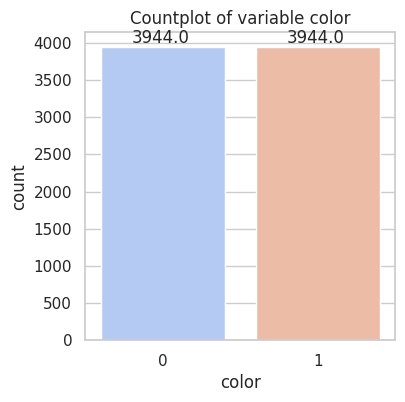

In [ ]:
plt.figure(figsize=(4,4))
plt.ticklabel_format(style='plain')
plt.gca().set_title('Countplot of variable color')
ax = sns.countplot(x= 'color', data=full_wine_dataset_processed, palette = 'coolwarm')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+50))

In [ ]:
wine_train_X_processed_full.iloc[:, :] = wine_train_X_processed_full.iloc[:, :].apply(zscore)

<ipython-input-82-def435102bcc>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       0.361511
1       0.361511
2       0.361511
3       0.361511
4       0.361511
          ...   
7883    0.361511
7884    0.361511
7885    1.538886
7886   -0.815864
7887   -0.815864
Name: quality, Length: 7888, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  wine_train_X_processed_full.iloc[:, :] = wine_train_X_processed_full.iloc[:, :].apply(zscore)


In [ ]:
# Create Train/Test Split
wine_train_X_processed_full = full_wine_dataset_processed.drop(columns=["color"], axis=1)
wine_train_Y_processed_full = full_wine_dataset_processed.color
wine_train_X, wine_test_X, wine_train_Y, wine_test_Y = train_test_split(full_wine_dataset_X, full_wine_dataset_Y, test_size = 0.2, random_state = 42, shuffle=True)
wine_train_X_processed, wine_test_X_processed, wine_train_Y_processed, wine_test_Y_processed = train_test_split(wine_train_X_processed_full, wine_train_Y_processed_full, test_size = 0.2, random_state = 42, shuffle=True)

1.2 Abalone Dataset

In [ ]:
column_names = [
    "Sex", "Length", "Diameter", "Height", "Whole_Weight",
    "Shucked_Weight", "Viscera_Weight", "Shell_Weight", "Rings"
]
abalone_full = pd.read_csv('abalone.csv', names=column_names, header=None)
bins = [0, 4, 8, 12, 16, 20, 24, 28]
labels = ["Baby", "Young", "Middle-Young", "Middle-Aged", "Middle-Old", "Old", "Very Old"]
abalone_full["Age_Category"] = pd.cut(abalone_full["Rings"], bins=bins, labels=labels, include_lowest=True)
abalone_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             4177 non-null   object  
 1   Length          4177 non-null   float64 
 2   Diameter        4177 non-null   float64 
 3   Height          4177 non-null   float64 
 4   Whole_Weight    4177 non-null   float64 
 5   Shucked_Weight  4177 non-null   float64 
 6   Viscera_Weight  4177 non-null   float64 
 7   Shell_Weight    4177 non-null   float64 
 8   Rings           4177 non-null   int64   
 9   Age_Category    4176 non-null   category
dtypes: category(1), float64(7), int64(1), object(1)
memory usage: 298.3+ KB


In [ ]:
le = LabelEncoder()
abalone_full['Sex'] = le.fit_transform(abalone_full['Sex'])
abalone_full

Sex  Length  Diameter  Height  Whole_Weight  Shucked_Weight  \
0       2   0.455     0.365   0.095        0.5140          0.2245   
1       2   0.350     0.265   0.090        0.2255          0.0995   
2       0   0.530     0.420   0.135        0.6770          0.2565   
3       2   0.440     0.365   0.125        0.5160          0.2155   
4       1   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172    0   0.565     0.450   0.165        0.8870          0.3700   
4173    2   0.590     0.440   0.135        0.9660          0.4390   
4174    2   0.600     0.475   0.205        1.1760          0.5255   
4175    0   0.625     0.485   0.150        1.0945          0.5310   
4176    2   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_Weight  Shell_Weight  Rings  Age_Category  
0             0.1010        0.1500     15   Middle-Aged  
1             0.0485        0.0700      7         Young  
2             0.1415        0.2100      9  Middle-Young  
3             0.1140        0.1550     10  Middle-Young  
4             0.0395        0.0550      7         Young  
...              ...           ...    ...           ...  
4172          0.2390        0.2490     11  Middle-Young  
4173          0.2145        0.2605     10  Middle-Young  
4174          0.2875        0.3080      9  Middle-Young  
4175          0.2610        0.2960     10  Middle-Young  
4176          0.3765        0.4950     12  Middle-Young  

[4177 rows x 10 columns]

In [ ]:
le = LabelEncoder()
abalone_full['Age_Category'] = le.fit_transform(abalone_full['Age_Category'])
abalone_full

Sex  Length  Diameter  Height  Whole_Weight  Shucked_Weight  \
0       2   0.455     0.365   0.095        0.5140          0.2245   
1       2   0.350     0.265   0.090        0.2255          0.0995   
2       0   0.530     0.420   0.135        0.6770          0.2565   
3       2   0.440     0.365   0.125        0.5160          0.2155   
4       1   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172    0   0.565     0.450   0.165        0.8870          0.3700   
4173    2   0.590     0.440   0.135        0.9660          0.4390   
4174    2   0.600     0.475   0.205        1.1760          0.5255   
4175    0   0.625     0.485   0.150        1.0945          0.5310   
4176    2   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_Weight  Shell_Weight  Rings  Age_Category  
0             0.1010        0.1500     15             1  
1             0.0485        0.0700      7             6  
2             0.1415        0.2100      9             3  
3             0.1140        0.1550     10             3  
4             0.0395        0.0550      7             6  
...              ...           ...    ...           ...  
4172          0.2390        0.2490     11             3  
4173          0.2145        0.2605     10             3  
4174          0.2875        0.3080      9             3  
4175          0.2610        0.2960     10             3  
4176          0.3765        0.4950     12             3  

[4177 rows x 10 columns]

In [ ]:
 # Answer 2: Computed mean , median , variance , skew , Kurtosis

stats = abalone_full.describe(include='all')

additional_stats = {
    "Variance": abalone_full.var(),
    "Skew": abalone_full.skew(),
    "Kurtosis": abalone_full.kurt()
}

for key, values in additional_stats.items():
    stats.loc[key] = values

print("Descriptive Statistics:\n", stats)

Descriptive Statistics:
                   Sex       Length     Diameter       Height  Whole_Weight  \
count     4177.000000  4177.000000  4177.000000  4177.000000   4177.000000   
mean         1.052909     0.523992     0.407881     0.139516      0.828742   
std          0.822240     0.120093     0.099240     0.041827      0.490389   
min          0.000000     0.075000     0.055000     0.000000      0.002000   
25%          0.000000     0.450000     0.350000     0.115000      0.441500   
50%          1.000000     0.545000     0.425000     0.140000      0.799500   
75%          2.000000     0.615000     0.480000     0.165000      1.153000   
max          2.000000     0.815000     0.650000     1.130000      2.825500   
Variance     0.676079     0.014422     0.009849     0.001750      0.240481   
Skew        -0.098155    -0.639873    -0.609198     3.128817      0.530959   
Kurtosis    -1.514387     0.064621    -0.045476    76.025509     -0.023644   

          Shucked_Weight  Viscera_Weig

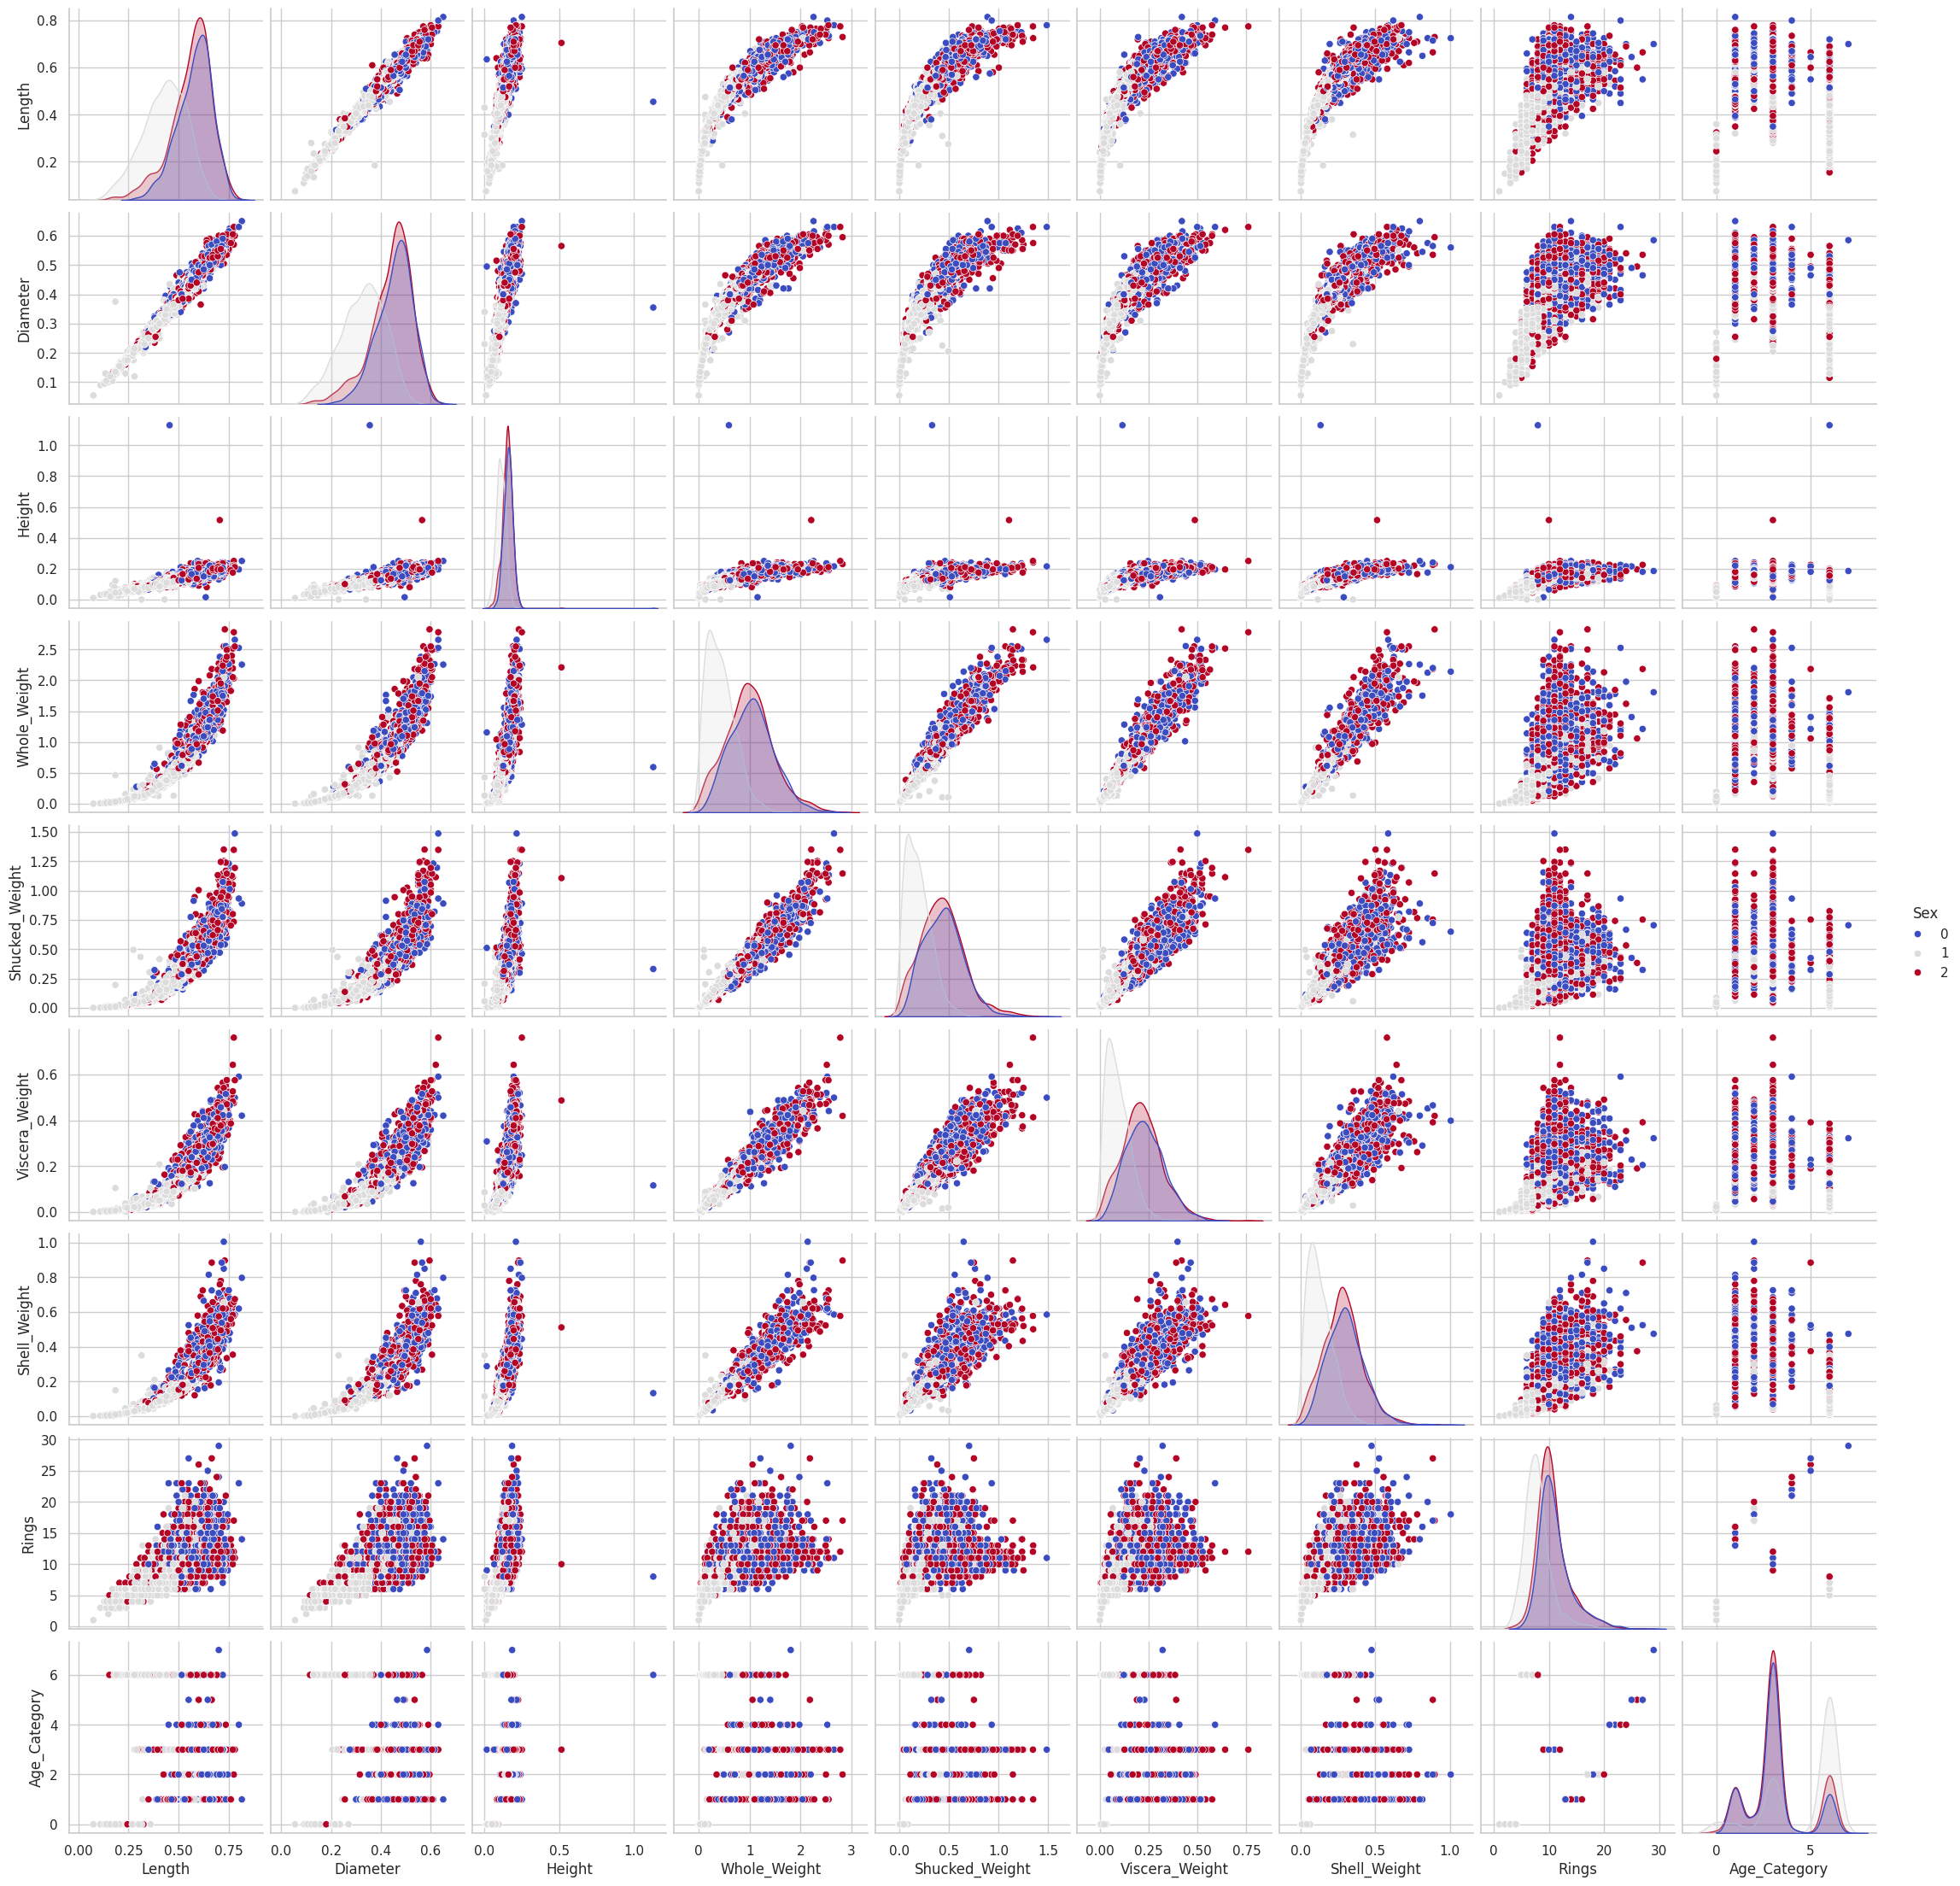

In [ ]:
# Answer 3: Used Pairplot to analyize the data.
sns.pairplot(abalone_full, hue='Sex', palette = 'coolwarm')
plt.show()

'Mean:'

Sex               1.052909
Length            0.523992
Diameter          0.407881
Height            0.139516
Whole_Weight      0.828742
Shucked_Weight    0.359367
Viscera_Weight    0.180594
Shell_Weight      0.238831
Rings             9.933684
Age_Category      3.637778
dtype: float64

'Median:'

Sex               1.0000
Length            0.5450
Diameter          0.4250
Height            0.1400
Whole_Weight      0.7995
Shucked_Weight    0.3360
Viscera_Weight    0.1710
Shell_Weight      0.2340
Rings             9.0000
Age_Category      3.0000
dtype: float64

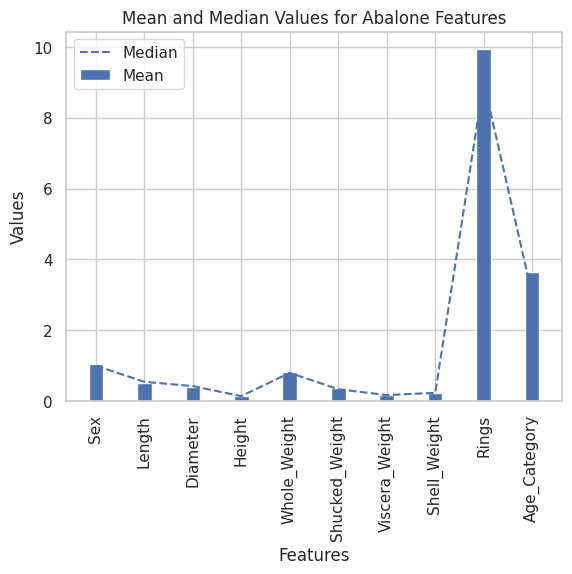

In [ ]:
means = abalone_full.mean()
medians = abalone_full.median()

display('Mean:',means)
display('Median:',medians)


# Create a bar graph for the mean values
fig, ax = plt.subplots()
bar_width = 0.3
bar_means = ax.bar(means.index, means.values, bar_width, label='Mean')

# Create a line graph for the median values
ax.plot(medians.index, medians.values, '--', label='Median')

# Add labels and title to the plot
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Mean and Median Values for Abalone Features')
ax.legend()

# Show the plot
plt.xticks(rotation=90)
plt.show()

'variance:'

Sex                0.676079
Length             0.014422
Diameter           0.009849
Height             0.001750
Whole_Weight       0.240481
Shucked_Weight     0.049268
Viscera_Weight     0.012015
Shell_Weight       0.019377
Rings             10.395266
Age_Category       3.156360
dtype: float64

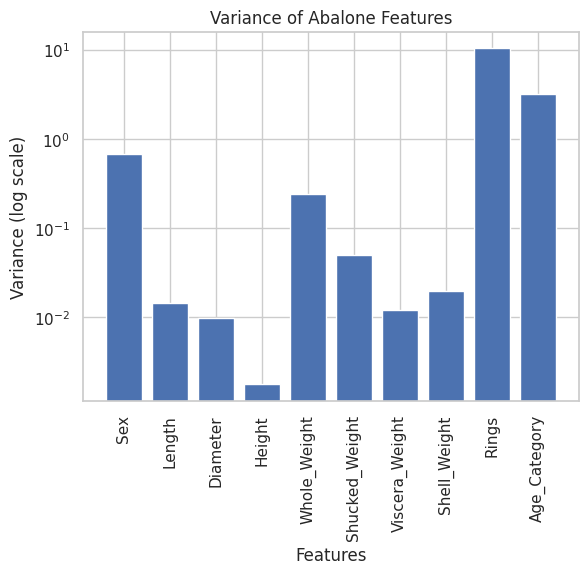

In [ ]:
# Representing Variance of Abalone features

variances = abalone_full.var()
display('variance:', variances)
# Create a bar graph of the variance values
fig, ax = plt.subplots()
ax.bar(variances.index, variances.values)
ax.set_yscale('log')
# Add labels and title to the plot
ax.set_xlabel('Features')
ax.set_ylabel('Variance (log scale)')
ax.set_title('Variance of Abalone Features')

# Show the plot
plt.xticks(rotation=90)
plt.show()

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_Weight', 'Shucked_Weight',
       'Viscera_Weight', 'Shell_Weight', 'Rings', 'Age_Category'],
      dtype='object')


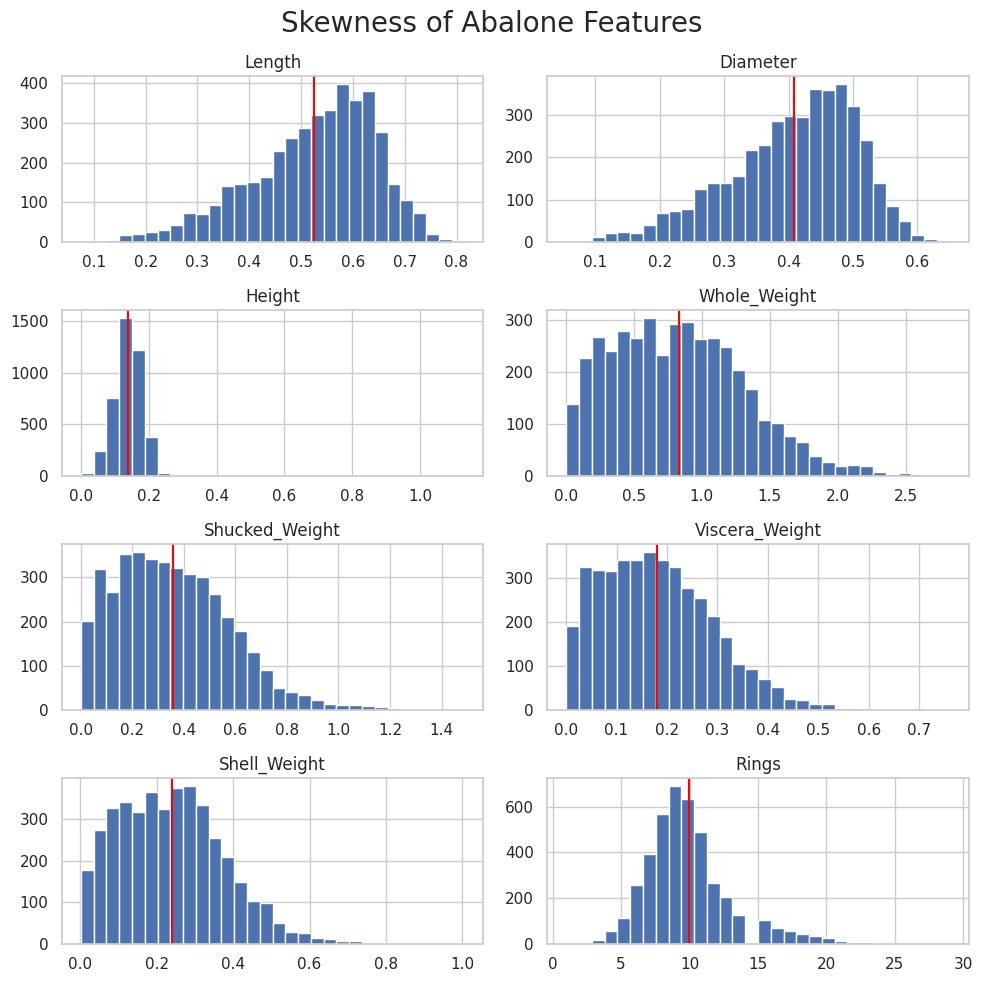

In [ ]:
# Ensuring column names in abalone DataFrame
print(abalone_full.columns)

# Plot skewness for each feature
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))

for x, ax in zip(column_names[1:], axs.flat):
    if x in abalone_full.columns:  # Ensure the column exists
        abalone_full[x].hist(bins=30, ax=ax)
        ax.axvline(x=np.mean(abalone_full[x]), color='red', label='mean')
        ax.set_title(x)

plt.suptitle('Skewness of Abalone Features', fontsize=20)
plt.tight_layout()
plt.show()


'Kurtosis:'

Sex               -1.514387
Length             0.064621
Diameter          -0.045476
Height            76.025509
Whole_Weight      -0.023644
Shucked_Weight     0.595124
Viscera_Weight     0.084012
Shell_Weight       0.531926
Rings              2.330687
Age_Category      -1.070584
dtype: float64

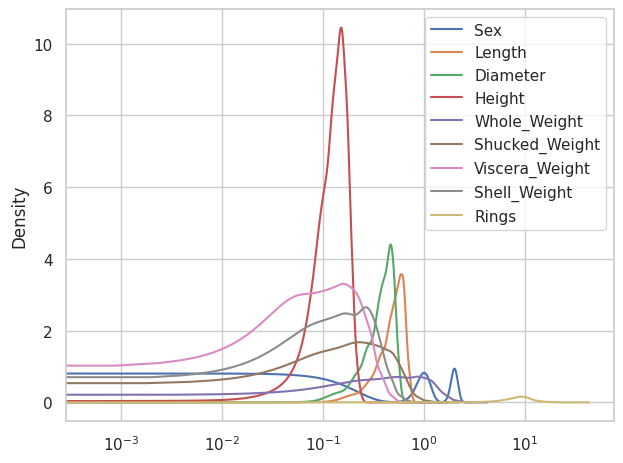

In [ ]:
kurt= abalone_full.kurtosis()
display('Kurtosis:',kurt)
features = [
    "Sex", "Length", "Diameter", "Height", "Whole_Weight",
    "Shucked_Weight", "Viscera_Weight", "Shell_Weight", "Rings"
]

# Show the subplot
fig,ax=plt.subplots()
for feature in features:
    abalone_full[feature].plot.kde(ax=ax,label=feature)

# Add a legend
ax.set_xscale('log')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


<Axes: >

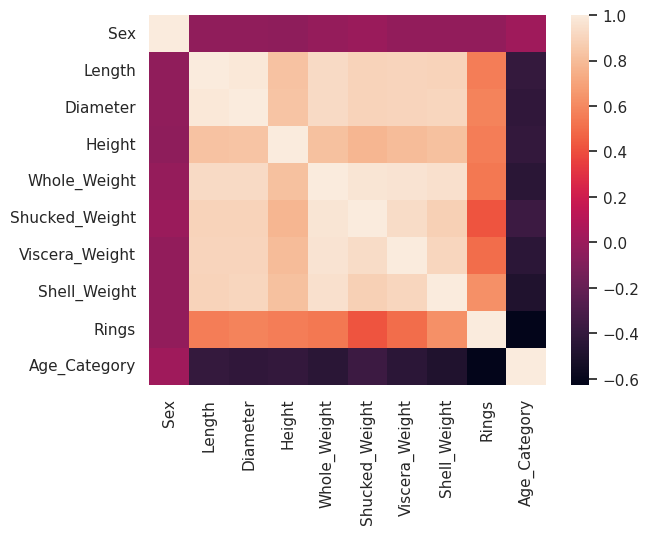

In [ ]:
cormat = abalone_full.corr()
round(cormat,4)
sns.heatmap(cormat)

<ipython-input-94-60faac669f48>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=abalone_full['Age_Category'],data=abalone_full,palette= 'Set2') #is the data balanced


<Axes: xlabel='Age_Category', ylabel='count'>

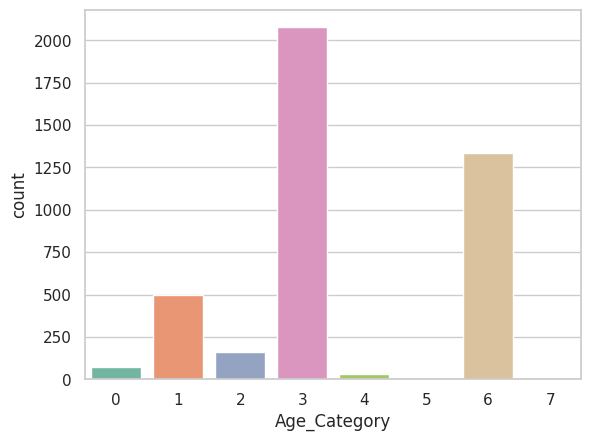

In [ ]:
sns.countplot(x=abalone_full['Age_Category'],data=abalone_full,palette= 'Set2') #is the data balanced

In [ ]:
# Normalising the abalone dataset
numerical_cols = ["Length", "Diameter", "Height", "Whole_Weight", "Shucked_Weight", "Viscera_Weight", "Shell_Weight", "Rings"]
abalone_full[numerical_cols] = abalone_full[numerical_cols].apply(zscore)
abalone_full

Sex    Length  Diameter    Height  Whole_Weight  Shucked_Weight  \
0       2 -0.574558 -0.432149 -1.064424     -0.641898       -0.607685   
1       2 -1.448986 -1.439929 -1.183978     -1.230277       -1.170910   
2       0  0.050033  0.122130 -0.107991     -0.309469       -0.463500   
3       2 -0.699476 -0.432149 -0.347099     -0.637819       -0.648238   
4       1 -1.615544 -1.540707 -1.423087     -1.272086       -1.215968   
...   ...       ...       ...       ...           ...             ...   
4172    0  0.341509  0.424464  0.609334      0.118813        0.047908   
4173    2  0.549706  0.323686 -0.107991      0.279929        0.358808   
4174    2  0.632985  0.676409  1.565767      0.708212        0.748559   
4175    0  0.841182  0.777187  0.250672      0.541998        0.773341   
4176    2  1.549052  1.482634  1.326659      2.283681        2.640993   

      Viscera_Weight  Shell_Weight     Rings  Age_Category  
0          -0.726212     -0.638217  1.571544             1  
1          -1.205221     -1.212987 -0.910013             6  
2          -0.356690     -0.207139 -0.289624             3  
3          -0.607600     -0.602294  0.020571             3  
4          -1.287337     -1.320757 -0.910013             6  
...              ...           ...       ...           ...  
4172        0.532900      0.073062  0.330765             3  
4173        0.309362      0.155685  0.020571             3  
4174        0.975413      0.496955 -0.289624             3  
4175        0.733627      0.410739  0.020571             3  
4176        1.787449      1.840481  0.640960             3  

[4177 rows x 10 columns]

In [ ]:
abalone_X = abalone_full.drop(columns=["Rings", "Age_Category"])
abalone_Y = abalone_full["Age_Category"]

In [ ]:
abalone_X_train, abalone_X_test, abalone_Y_train, abalone_Y_test= train_test_split(abalone_X, abalone_Y, random_state=123, train_size=0.8)

In [ ]:
# Normalize
z_scaled= abalone_X.copy()
for column in z_scaled.columns[1:]:
     z_scaled[column]= (z_scaled[column]-z_scaled[column].mean())/z_scaled[column].std()
z_scaled

Sex    Length  Diameter    Height  Whole_Weight  Shucked_Weight  \
0       2 -0.574489 -0.432097 -1.064297     -0.641821       -0.607613   
1       2 -1.448812 -1.439757 -1.183837     -1.230130       -1.170770   
2       0  0.050027  0.122116 -0.107978     -0.309432       -0.463444   
3       2 -0.699393 -0.432097 -0.347058     -0.637743       -0.648160   
4       1 -1.615350 -1.540523 -1.422916     -1.271933       -1.215822   
...   ...       ...       ...       ...           ...             ...   
4172    0  0.341468  0.424414  0.609261      0.118799        0.047902   
4173    2  0.549640  0.323648 -0.107978      0.279896        0.358765   
4174    2  0.632909  0.676328  1.565580      0.708127        0.748470   
4175    0  0.841081  0.777094  0.250642      0.541933        0.773248   
4176    2  1.548867  1.482456  1.326500      2.283407        2.640677   

      Viscera_Weight  Shell_Weight  
0          -0.726125     -0.638140  
1          -1.205077     -1.212842  
2          -0.356647     -0.207114  
3          -0.607527     -0.602222  
4          -1.287183     -1.320599  
...              ...           ...  
4172        0.532836      0.073053  
4173        0.309325      0.155666  
4174        0.975296      0.496895  
4175        0.733540      0.410690  
4176        1.787235      1.840260  

[4177 rows x 8 columns]

In [ ]:
abalone_X_train_processed, abalone_X_test_processed, abalone_Y_train_processed, abalone_Y_test_processed = train_test_split(z_scaled, abalone_Y, test_size=0.2, random_state=42, shuffle=True)

# Part 2: Classifcation with KNN


2.1 Abalone Dataset

In [ ]:
knn = KNeighborsClassifier()
knn.fit(abalone_X_train_processed, abalone_Y_train_processed)
base_acc = knn.score(abalone_X_test_processed, abalone_Y_test_processed)
print("Baseline Accuracy: {:.2f}%".format(base_acc * 100))

Baseline Accuracy: 65.55%


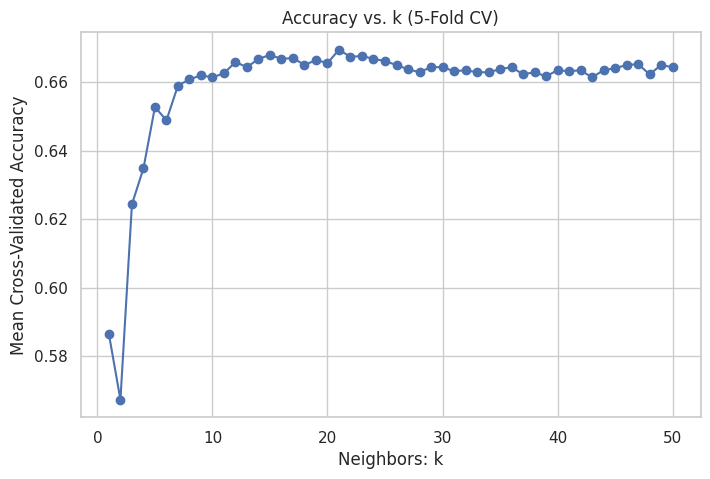

Best k:  21


In [ ]:
k_values = range(1, 51)
cv_scores = []

cv = KFold(n_splits=5, shuffle=True, random_state=42)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, abalone_X_train_processed, abalone_Y_train_processed, cv=cv, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot mean validation accuracy vs. k
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Neighbors: k')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Accuracy vs. k (5-Fold CV)')
plt.grid(True)
plt.show()

# Determine the best k
k_best_abalone = k_values[np.argmax(cv_scores)]
print("Best k: ", k_best_abalone)

In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=k_best_abalone)
best_knn.fit( abalone_X_train_processed, abalone_Y_train_processed)
best_test_accuracy_abalone = best_knn.score(abalone_X_test_processed, abalone_Y_test_processed)
print("Test Accuracy with best k (k={}): {:.2f}%".format(k_best_abalone, best_test_accuracy_abalone * 100))

Test Accuracy with best k (k=21): 68.18%


In [ ]:
weight_knn = KNeighborsClassifier(n_neighbors=k_best_abalone, weights='distance')
weight_knn.fit( abalone_X_train_processed, abalone_Y_train_processed)
weighted_test_accuracy_abalone = weight_knn.score(abalone_X_test_processed, abalone_Y_test_processed)
print("Test Accuracy with weighted KNN (k={}): {:.2f}%".format(k_best_abalone, weighted_test_accuracy_abalone * 100))

Test Accuracy with weighted KNN (k=21): 67.34%


2.2 Wine Dataset

In [ ]:
knn = KNeighborsClassifier()
knn.fit(wine_train_X, wine_train_Y)
base_acc = knn.score(wine_test_X, wine_test_Y)
print("Baseline Test Accuracy (default parameters): {:.2f}%".format(base_acc * 100))


Baseline Test Accuracy (default parameters): 93.61%


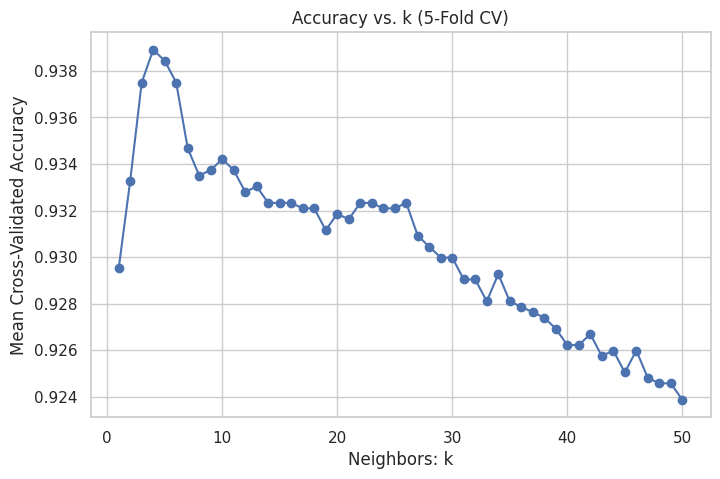

Best k:  4


In [ ]:
k_values = range(1, 51)
cv_scores = []

cv = KFold(n_splits=5, shuffle=True, random_state=42)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, wine_train_X, wine_train_Y, cv=cv, scoring='accuracy')
    cv_scores.append(scores.mean())

plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Neighbors: k')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Accuracy vs. k (5-Fold CV)')
plt.grid(True)
plt.show()

k_best_wine = k_values[np.argmax(cv_scores)]
print("Best k: ", k_best_wine)

In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=k_best_wine)
best_knn.fit(wine_train_X, wine_train_Y)
best_test_accuracy_wine = best_knn.score(wine_test_X, wine_test_Y)
print("Test Accuracy with best k (k={}): {:.2f}%".format(k_best_wine, best_test_accuracy_wine * 100))

Test Accuracy with best k (k=4): 94.27%


In [ ]:
weight_knn = KNeighborsClassifier(n_neighbors=k_best_wine, weights='distance')
weight_knn.fit(wine_train_X, wine_train_Y)
weighted_test_accuracy_wine = weight_knn.score(wine_test_X, wine_test_Y)
print("Test Accuracy with weighted KNN (k={}): {:.2f}%".format(k_best_wine, weighted_test_accuracy_wine * 100))

Test Accuracy with weighted KNN (k=4): 94.27%


# Part 3: Decision Tree Classifier

In [ ]:
def tune_decision_tree_cv(X_train, y_train):
    param_grid = {'max_depth': range(2, 31)}  # Testing depths from 2 to 30

    dt = DecisionTreeClassifier(random_state=42)

    grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', return_train_score=True)
    grid_search.fit(X_train, y_train)

    return grid_search

# Perform GridSearchCV with 5-Fold Cross Validation
wine_grid_search = tune_decision_tree_cv(wine_train_X, wine_train_Y)
abalone_grid_search = tune_decision_tree_cv(abalone_X_train, abalone_Y_train)

# Extract best max_depth for both datasets
best_depth_wine = wine_grid_search.best_params_['max_depth']
best_depth_abalone = abalone_grid_search.best_params_['max_depth']

# Get accuracy scores for all depths
wine_accuracies = wine_grid_search.cv_results_['mean_test_score']
abalone_accuracies = abalone_grid_search.cv_results_['mean_test_score']
depths = range(2, 31)



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Decision Tree Depth for Wine Dataset: 5
Best Decision Tree Depth for Abalone Dataset: 5


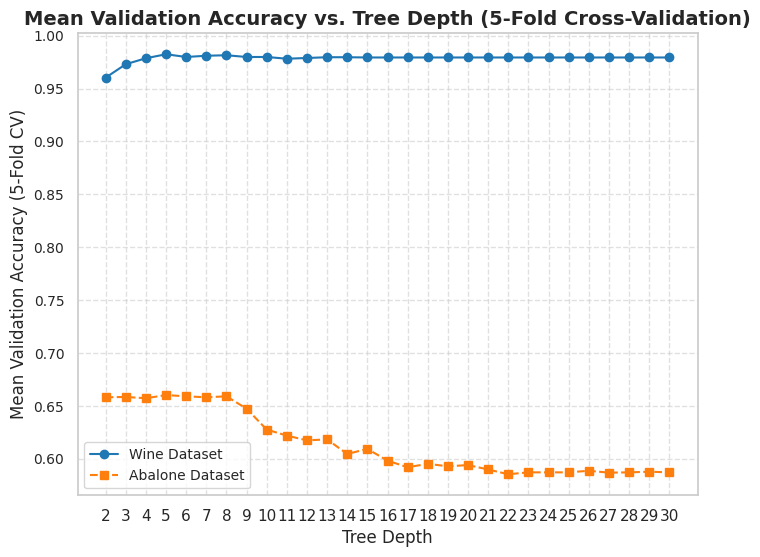

In [ ]:
# Plot mean accuracy vs. tree depth
plt.figure(figsize=(8, 6))  # Set figure size

plt.plot(depths, wine_accuracies, marker='o', linestyle='-',color='#1f77b4', label="Wine Dataset")
plt.plot(depths, abalone_accuracies, marker='s', linestyle='--',color='#ff7f0e', label="Abalone Dataset")

plt.xlabel("Tree Depth", fontsize=12)
plt.ylabel("Mean Validation Accuracy (5-Fold CV)", fontsize=12)
plt.title("Mean Validation Accuracy vs. Tree Depth (5-Fold Cross-Validation)", fontsize=14, fontweight='bold')

plt.legend(loc="best", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid for better readability
plt.xticks(depths)  # Ensure depth values are correctly displayed on x-axis
plt.yticks(fontsize=10)

# Print Best Depth Results
print(f"Best Decision Tree Depth for Wine Dataset: {best_depth_wine}")
print(f"Best Decision Tree Depth for Abalone Dataset: {best_depth_abalone}")


In [ ]:
# Train final decision tree models with best depth
dt_wine = DecisionTreeClassifier(max_depth=best_depth_wine, random_state=42)
dt_wine.fit(wine_train_X, wine_train_Y)

dt_abalone = DecisionTreeClassifier(max_depth=best_depth_abalone, random_state=42)
dt_abalone.fit(abalone_X_train, abalone_Y_train)

# Compute test accuracy
wine_test_acc = dt_wine.score(wine_test_X, wine_test_Y)
abalone_test_acc = dt_abalone.score(abalone_X_test, abalone_Y_test)

print(f"Wine Dataset Test Accuracy: {wine_test_acc:.4f}")
print(f"Abalone Dataset Test Accuracy: {abalone_test_acc:.4f}")


Wine Dataset Test Accuracy: 0.9850
Abalone Dataset Test Accuracy: 0.6555


In [ ]:
# Find the best depth
best_depth_wine = depths[np.argmax(wine_accuracies)]
best_depth_abalone = depths[np.argmax(abalone_accuracies)]

# Train models with the best depth
dt_wine = DecisionTreeClassifier(max_depth=best_depth_wine, random_state=42)
dt_wine.fit(wine_train_X, wine_train_Y)

dt_abalone = DecisionTreeClassifier(max_depth=best_depth_abalone, random_state=42)
dt_abalone.fit(abalone_X_train, abalone_Y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

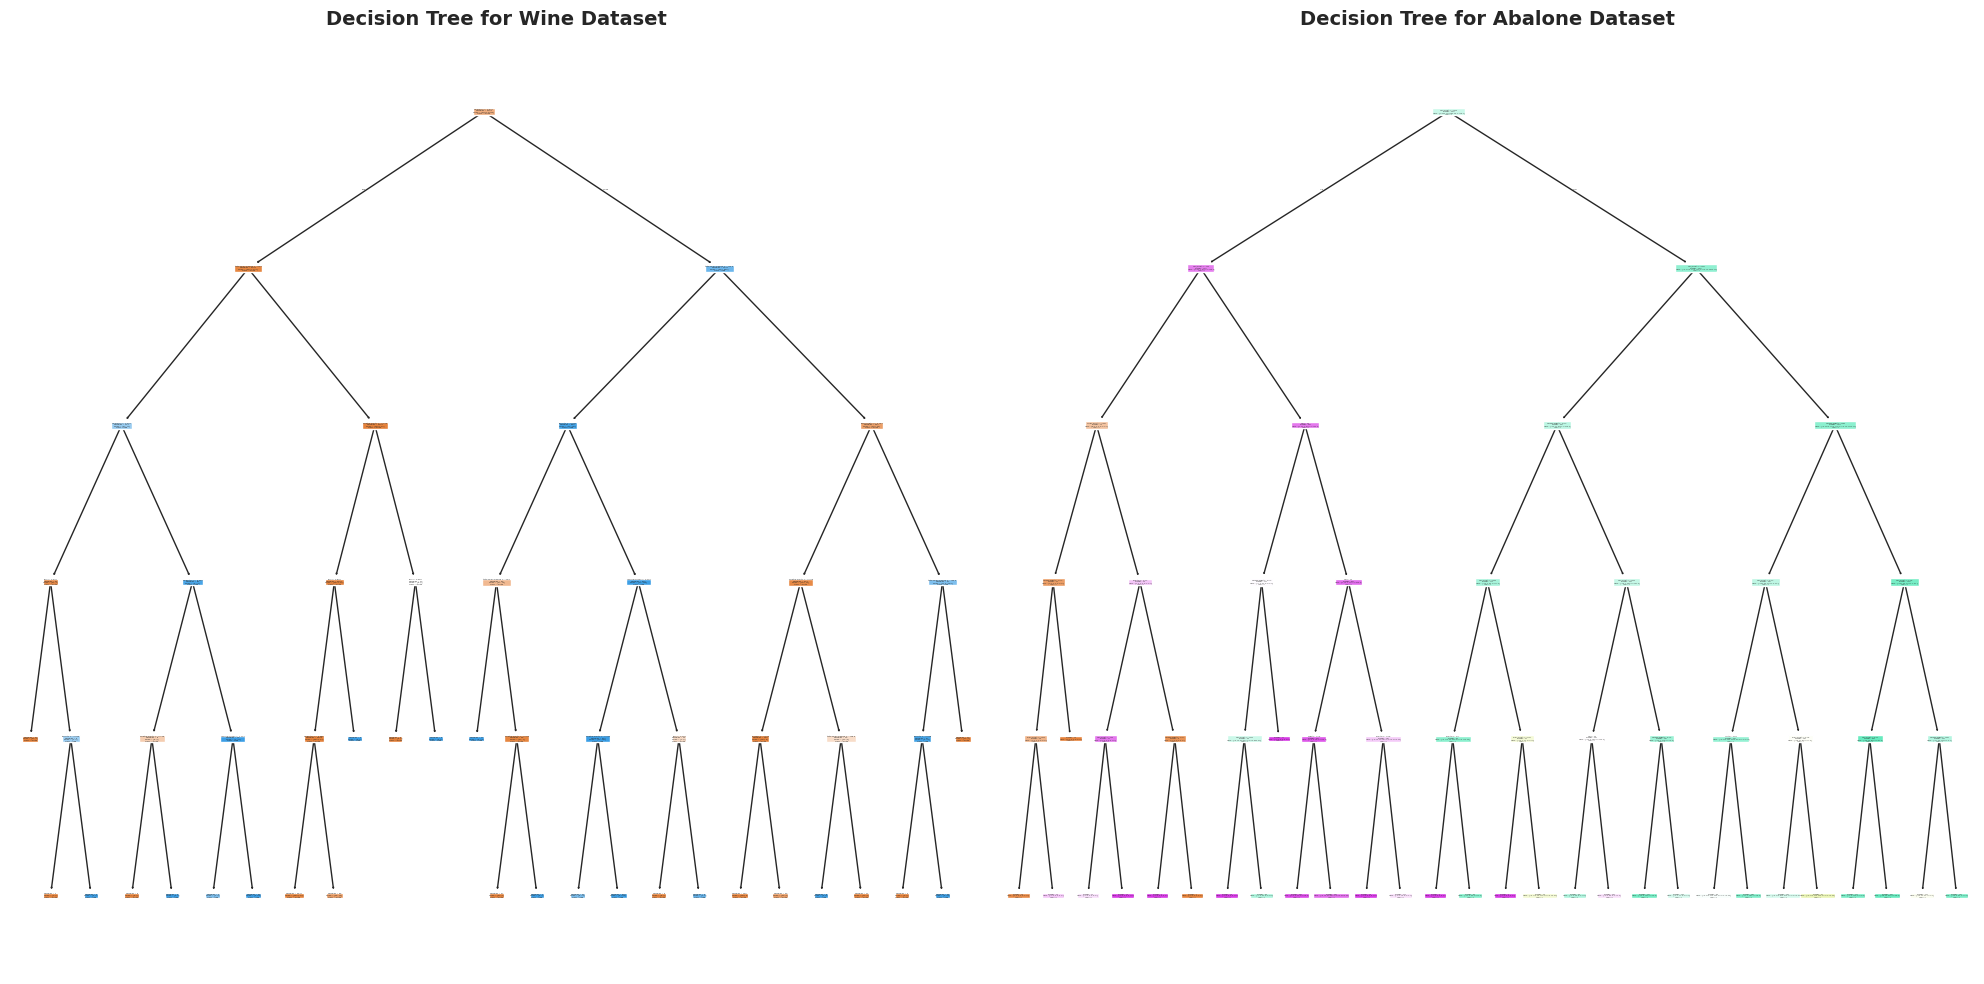

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Define custom colors
wine_colors = {'boxes': '#1f77b4', 'edges': '#1f77b4', 'text': '#ffffff'}
abalone_colors = {'boxes': '#ff7f0e', 'edges': '#ff7f0e', 'text': '#ffffff'}

# Plot the Wine Dataset Decision Tree
plot_tree(
    dt_wine,
    feature_names=wine_train_X.columns,
    class_names=['White', 'Red'],
    filled=True,
    impurity=False,
    ax=axes[0]
)
axes[0].set_title("Decision Tree for Wine Dataset", fontsize=14, fontweight='bold')

# Plot the Abalone Dataset Decision Tree
plot_tree(
    dt_abalone,
    feature_names=abalone_X_train_processed.columns,
    class_names=[str(i) for i in np.unique(abalone_Y_train_processed)],
    filled=True,
    impurity=False,
    ax=axes[1]
)
axes[1].set_title("Decision Tree for Abalone Dataset", fontsize=14, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Export tree rules as text
wine_rules = export_text(dt_wine, feature_names=list(wine_train_X.columns))
abalone_rules = export_text(dt_abalone, feature_names=list(abalone_X_train_processed.columns))

# Print rules
print("Wine Decision Tree Rules:")
print(wine_rules)

print("\nAbalone Decision Tree Rules:")
print(abalone_rules)


Wine Decision Tree Rules:
|--- chlorides <= 0.25
|   |--- total sulfur dioxide <= 54.00
|   |   |--- chlorides <= 0.20
|   |   |   |--- pH <= 3.38
|   |   |   |   |--- class: 0
|   |   |   |--- pH >  3.38
|   |   |   |   |--- density <= 1.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- density >  1.00
|   |   |   |   |   |--- class: 1
|   |   |--- chlorides >  0.20
|   |   |   |--- sulphates <= 0.64
|   |   |   |   |--- volatile acidity <= 0.75
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- volatile acidity >  0.75
|   |   |   |   |   |--- class: 1
|   |   |   |--- sulphates >  0.64
|   |   |   |   |--- residual sugar <= 1.16
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- residual sugar >  1.16
|   |   |   |   |   |--- class: 1
|   |--- total sulfur dioxide >  54.00
|   |   |--- volatile acidity <= 0.91
|   |   |   |--- pH <= 3.83
|   |   |   |   |--- sulphates <= 0.89
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- sulphates >  0.89
|   |   |   |   |  

In [ ]:
results_table = pd.DataFrame({
    "Dataset": ["Wine", "Abalone"],
    "Best Tree Depth": [best_depth_wine, best_depth_abalone],
    "Test Accuracy": [wine_test_acc, abalone_test_acc]
})

display(results_table)

print("Results Summary Generated!")


Dataset  Best Tree Depth  Test Accuracy
0     Wine                5       0.984962
1  Abalone                5       0.655502

Results Summary Generated!


# PART 4: Random Forest Classifier #

4.1 Wine Quality Dataset

In [ ]:
classifier = RandomForestClassifier()

forest_params = [{'max_depth': list(range(3, 20)), "n_estimators":list(range(3, 15))}]
clf_wine = GridSearchCV(classifier, forest_params, cv = 5, scoring='accuracy')

clf_wine.fit(wine_train_X, wine_train_Y)
print(clf_wine.best_params_)

{'max_depth': 12, 'n_estimators': 14}


In [ ]:
tunedClassifier=RandomForestClassifier(max_depth= clf_wine.best_params_['max_depth'],  n_estimators=clf_wine.best_params_['n_estimators'])
tunedClassifier.fit(wine_train_X, wine_train_Y)

RandomForestClassifier(max_depth=12, n_estimators=14)

In [ ]:
Y_pred_rfc = tunedClassifier.predict(wine_test_X)
rf_accuracy_wine = accuracy_score(wine_test_Y, Y_pred_rfc)
print("accuracy score of the RandomForestClassifier: ", str(accuracy_score(wine_test_Y, Y_pred_rfc)*100))

accuracy score of the RandomForestClassifier:  99.15413533834587


In [ ]:
res=clf_wine.cv_results_
mean_score=res['mean_test_score']
params=res['params']

In [ ]:
scores_df = pd.DataFrame({
    'max_depth': [p['max_depth'] for p in params],
    'n_estimators': [p['n_estimators'] for p in params],
    # 'min_samples_split': [p['min_samples_split'] for p in params],
    'mean_accuracy': mean_score
})

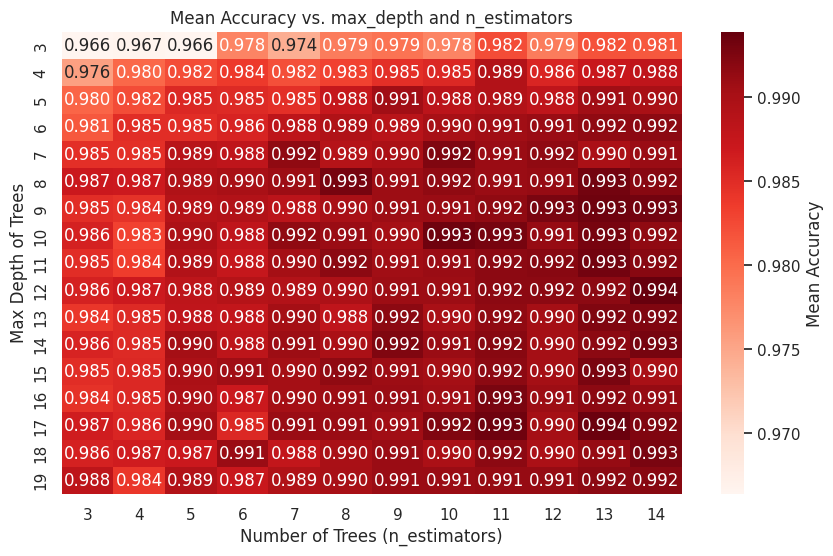

In [ ]:
heatmap_data = scores_df.pivot(index='max_depth', columns='n_estimators', values='mean_accuracy')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="Reds", cbar_kws={'label': 'Mean Accuracy'})
plt.title('Mean Accuracy vs. max_depth and n_estimators')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Max Depth of Trees')
plt.show()


In [ ]:
print(classification_report(wine_test_Y, Y_pred_rfc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       797
           1       1.00      0.97      0.98       267

    accuracy                           0.99      1064
   macro avg       0.99      0.98      0.99      1064
weighted avg       0.99      0.99      0.99      1064



4.2 Abalone Dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search_aba = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search_aba.fit(abalone_X_train_processed, abalone_Y_train_processed)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [ ]:
best_rf = grid_search_aba.best_estimator_
y_pred = best_rf.predict(abalone_X_test_processed)
rf_accuracy_abalone = accuracy_score(abalone_Y_test_processed, y_pred)
rf_accuracy_abalone


0.6650717703349283

In [ ]:
print(grid_search_aba.best_params_)

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [ ]:
res=grid_search_aba.cv_results_
mean_score=res['mean_test_score']
params=res['params']

In [ ]:
scores_df_aba = pd.DataFrame({
    'max_depth': [p['max_depth'] for p in params],
    'n_estimators': [p['n_estimators'] for p in params],
    # 'min_samples_split': [p['min_samples_split'] for p in params],
    'mean_accuracy': mean_score
})
scores_df_aba

max_depth  n_estimators  mean_accuracy
0           5            50       0.663574
1           5           100       0.666568
2           5           150       0.667166
3           5            50       0.665370
4           5           100       0.665369
..        ...           ...            ...
76         20           100       0.675549
77         20           150       0.677045
78         20            50       0.678838
79         20           100       0.680036
80         20           150       0.680634

[81 rows x 3 columns]

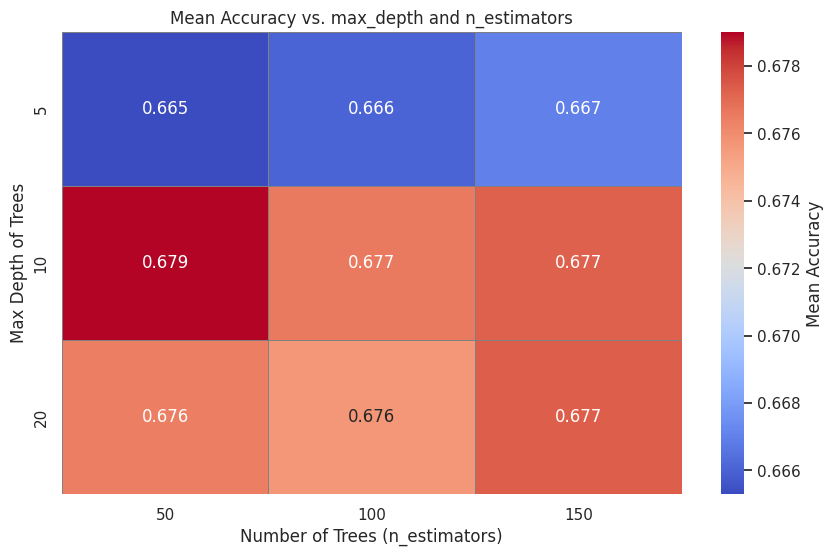

In [ ]:
heatmap_data = scores_df_aba.pivot_table(
    index='max_depth',
    columns='n_estimators',
    values='mean_accuracy',
    # aggfunc='mean'  # or 'first', 'last', etc. depending on your need
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="coolwarm", cbar_kws={'label': 'Mean Accuracy'},linewidths=0.5, linecolor='gray')
plt.title('Mean Accuracy vs. max_depth and n_estimators')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Max Depth of Trees')
plt.show()

# Final Result

In [ ]:
final_results = PrettyTable(["Model Name", "Optimized Setting for Wine", "Wine Accuracy", "Optimized Setting for Abalone", "Abalone Accuracy"])

In [ ]:
final_results.add_row(["K Nearest Neighbors Classifier", {'k':k_best_wine} , round(weighted_test_accuracy_wine*100,3), {'k': k_best_abalone}, round(weighted_test_accuracy_abalone*100,3)])
final_results.add_row(["Decision Tree Classifier", wine_grid_search.best_params_ , round(wine_test_acc*100,3), abalone_grid_search.best_params_, round(abalone_test_acc*100,3)])
final_results.add_row(["Random Forest Classifier", clf_wine.best_params_ , round(rf_accuracy_wine*100,3), grid_search_aba.best_params_, round(rf_accuracy_abalone*100,3)])

In [ ]:
print(final_results)


+--------------------------------+---------------------------------------+---------------+---------------------------------------------------------------------------------------+------------------+
|           Model Name           |       Optimized Setting for Wine      | Wine Accuracy |                             Optimized Setting for Abalone                             | Abalone Accuracy |
+--------------------------------+---------------------------------------+---------------+---------------------------------------------------------------------------------------+------------------+
| K Nearest Neighbors Classifier |                {'k': 4}               |     94.267    |                                       {'k': 21}                                       |      67.344      |
|    Decision Tree Classifier    |            {'max_depth': 5}           |     98.496    |                                    {'max_depth': 5}                                   |      65.55       |
|    Rando